Black-Scholes Model

In [ ]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
from math import log, sqrt, exp
from scipy.stats import norm
import time
import pylab

: 

In [2]:
spot = 2.45 #S
strike = 2.5 #K
maturity = 0.25 #t
r = 0.05 #r
vol = 0.25 #sigma

In [4]:
def call_option_pricer(spot, strike, maturity, r, vol):
    d1 = (log(spot/strike) + (r + 0.5 * vol ** 2) * maturity) / vol / sqrt(maturity)
    d2 = d1 - vol * sqrt(maturity)
    price = spot * norm.cdf(d1) - strike * exp(-r * maturity) * norm.cdf(d2)
    return(f'the call price is:', price)
call_option_pricer(spot, strike, maturity, r, vol)

('the call price is:', 0.11332871320482885)

Monte Carlo simulation

mean: -0.03321853325608849
std: 0.9819622300685642


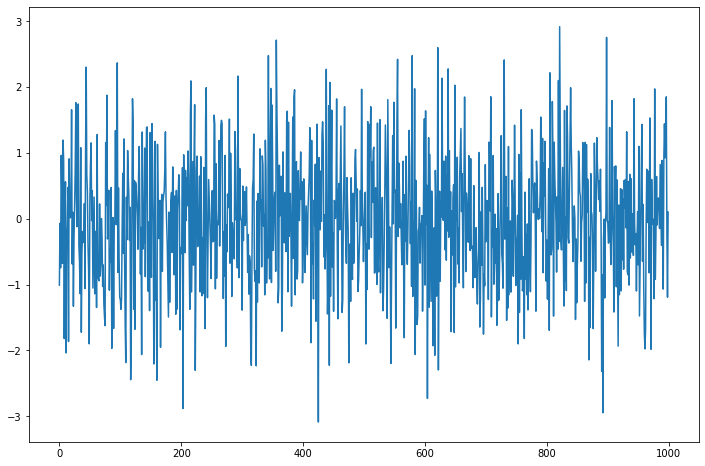

In [15]:

scipy.random.randn(10)
pylab.figure(figsize = (12,8))
randomSeries = scipy.random.randn(1000)
pylab.plot(randomSeries)
print(f'mean:', randomSeries.mean())
print(f'std:', randomSeries.std())

In [19]:
def call_option_pricer_mc(spot, strike, maturity, r, vol, numOfPath = 5000):
    randomSeries = scipy.random.randn(numOfPath)
    s_t = spot * np.exp((r - 0.5 * vol ** 2) * maturity + randomSeries * vol * sqrt(maturity))
    sumValue = np.maximum(s_t - strike, 0.0).sum()
    price = np.exp(-r * maturity) * sumValue / numOfPath
    return price
print(f'price simulated by montecarlo:', call_option_pricer_mc(spot, strike, maturity, r, vol))

price simulated by montecarlo: 0.1127947743412508


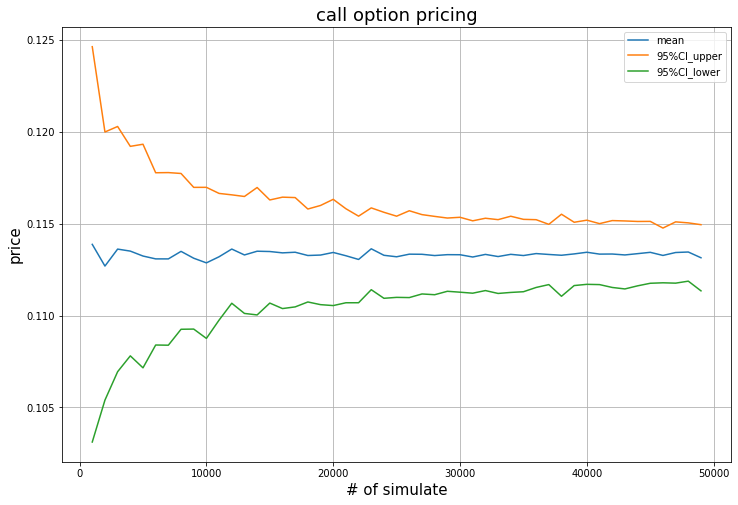

In [22]:
from matplotlib.font_manager import FontProperties

pathScenario  = range(1000, 50000, 1000)
numberOfTries = 100

CI_upper = []
CI_lower = []
means = []
for scenario in pathScenario:
    res = np.zeros(numberOfTries)
    for i in range(numberOfTries):
        res[i] = call_option_pricer_mc(spot, strike, maturity, r, vol, numOfPath = scenario)
    means.append(res.mean())
    CI_upper.append(res.mean() + 1.96 * res.std())
    CI_lower.append(res.mean() - 1.96 * res.std())

pylab.figure(figsize = (12,8))
table = np.array([means, CI_upper, CI_lower]).T
pylab.plot(pathScenario, table)
pylab.title(f'call option pricing', fontsize = 18)
pylab.legend(['mean', '95%CI_upper', '95%CI_lower'])
pylab.ylabel('price', fontsize = 15)
pylab.xlabel('# of simulate', fontsize = 15)
pylab.grid(True)